# Cap. 6 - NumPy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Polinômios

O numpy fornece um conjunto de classes para representar polinômios (de vários tipos) e também métodos relacionados a álgebra, cálculo, cálculo de raízes e ajuste.

### Definindo e avaliando polinômios

Vamos começar com o caso mais simples de uma série finita de potências de $x$:


$$
\begin{split}
P(x) &= c_0+c_1 x + c_2 x^2 +\dots c_N x^N\\
P(x) &= \sum_{i=0}^{N}c_i x^i
\end{split}
$$

In [ ]:
#classe do numpy que implementa esse tipo de objeto
from numpy.polynomial import Polynomial

Por exemplo, para definir:

$$
P(x)=6-5x+x^2
$$
fazemos

In [ ]:
p = Polynomial(coef=[6, -5, 1])

In [ ]:
p

Polynomial([ 6., -5.,  1.], domain=[-1,  1], window=[-1,  1])

In [ ]:
print(p)

6.0 - 5.0·x¹ + 1.0·x²


In [ ]:
p.coef

array([ 6., -5.,  1.])

In [ ]:
#para avaliar p
p(4)

2.0

In [ ]:
#são vetorizados
x = np.linspace(-5, 5, 11)
p(x)

array([56., 42., 30., 20., 12.,  6.,  2.,  0.,  0.,  2.,  6.])

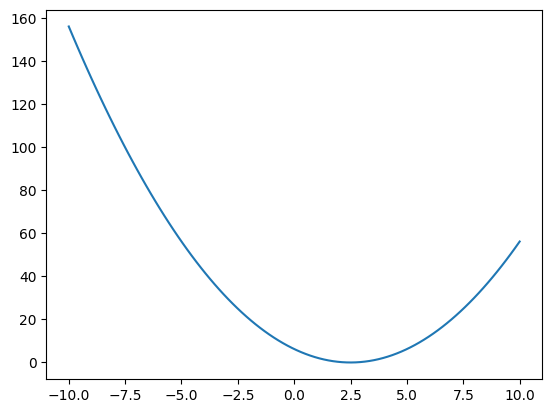

In [ ]:
x = np.linspace(-10, 10, 100)
plt.plot(x,p(x))

### Algebra com polinômios

Supondo:

$$
P(x)=6-5x+x^2
$$

e
$$
Q(x) = 2 -3x
$$

definidos usando a classe `Polynomial` do numpy, podemos usar os operadores padrões do Python:

In [ ]:
p = Polynomial(coef=[6, -5, 1])
q = Polynomial(coef=[2, -3])

print("p =",p)
print("q =",q)

p = 6.0 - 5.0·x¹ + 1.0·x²
q = 2.0 - 3.0·x¹


In [ ]:
p+q

Polynomial([ 8., -8.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
p-q

In [ ]:
p*q

Polynomial([ 12., -28.,  17.,  -3.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
p//q

Polynomial([ 1.44444444, -0.33333333], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
p % q

Polynomial([3.11111111], domain=[-1.,  1.], window=[-1.,  1.])

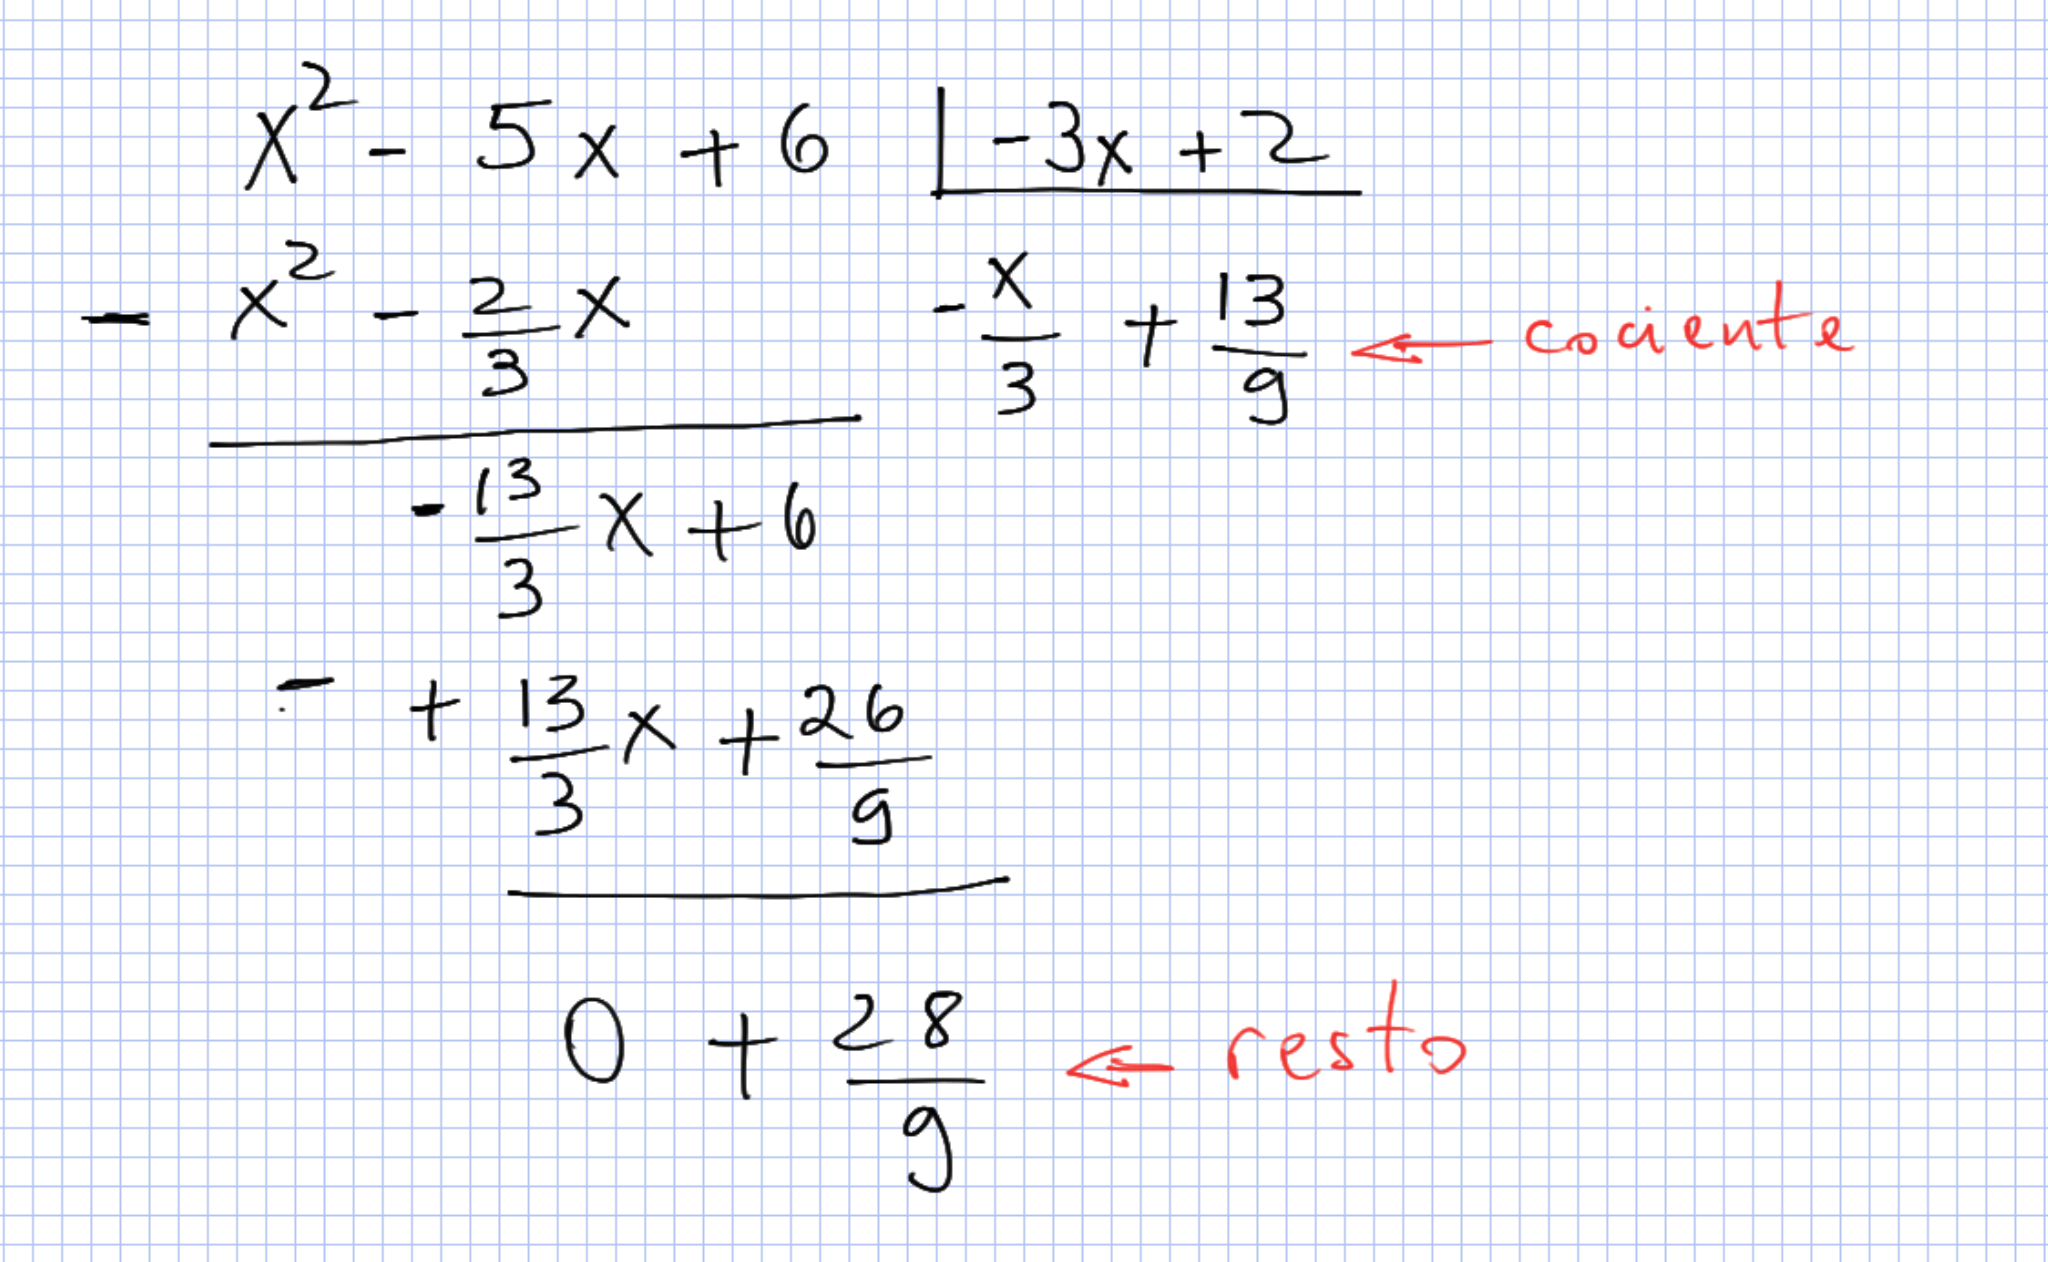

In [ ]:
13/9.,1/3.,28/9.

(1.4444444444444444, 0.3333333333333333, 3.111111111111111)

In [ ]:
quociente, resto = divmod(p, q)

In [ ]:
quociente

Polynomial([ 1.44444444, -0.33333333], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
resto

Polynomial([3.11111111], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
q

Polynomial([ 2., -3.], domain=[-1,  1], window=[-1,  1])

In [ ]:
#exponenciação
q**2

Polynomial([  4., -12.,   9.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
#multiplicação por escalar
q*2

Polynomial([ 4., -6.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
#divisão por escalar
q/2

Polynomial([ 1. , -1.5], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
q

Polynomial([ 2., -3.], domain=[-1,  1], window=[-1,  1])

In [ ]:
#multiplicação por tupla de coefs.
q*[2,3]
#(2-3x)*(2+3x) = 4-9x**2

Polynomial([ 4.,  0., -9.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
p

Polynomial([ 6., -5.,  1.], domain=[-1,  1], window=[-1,  1])

In [ ]:
q

Polynomial([ 2., -3.], domain=[-1,  1], window=[-1,  1])

In [ ]:
#podemos ainda calcular p(q(x))

p(q)

Polynomial([0., 3., 9.], domain=[-1.,  1.], window=[-1.,  1.])

### Raízes de polinômios

Para isso usamos o método `.roots`

In [ ]:
q.roots()

array([0.66666667])

In [ ]:
p.roots()

array([2., 3.])

In [ ]:
p(q).roots()

array([-0.33333333,  0.        ])

In [ ]:
s = Polynomial([4 , 0, 1])
s


Polynomial([4., 0., 1.], domain=[-1,  1], window=[-1,  1])

In [ ]:
s.roots()

array([0.-2.j, 0.+2.j])

In [ ]:
#podemos criar um polinômio passando suas raízes

In [ ]:
s1 = Polynomial.fromroots([-2j, +2j])
s1

Polynomial([4.+0.j, 0.+0.j, 1.+0.j], domain=[-1.,  1.], window=[-1.,  1.])

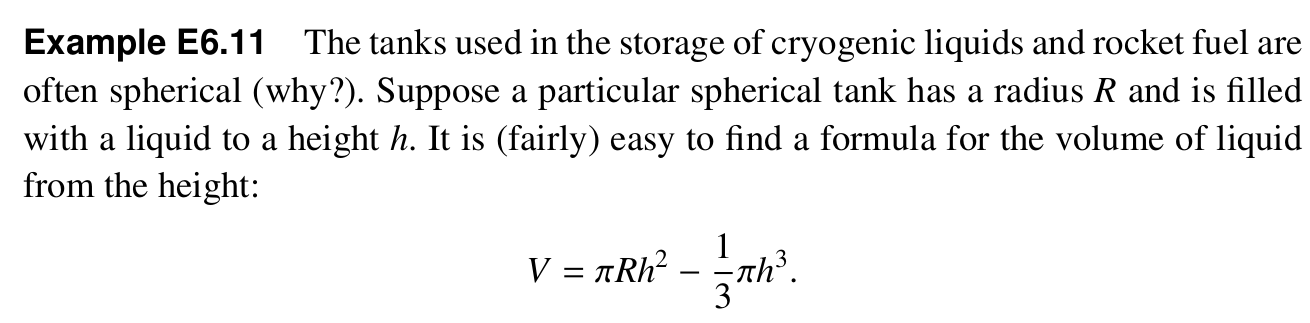

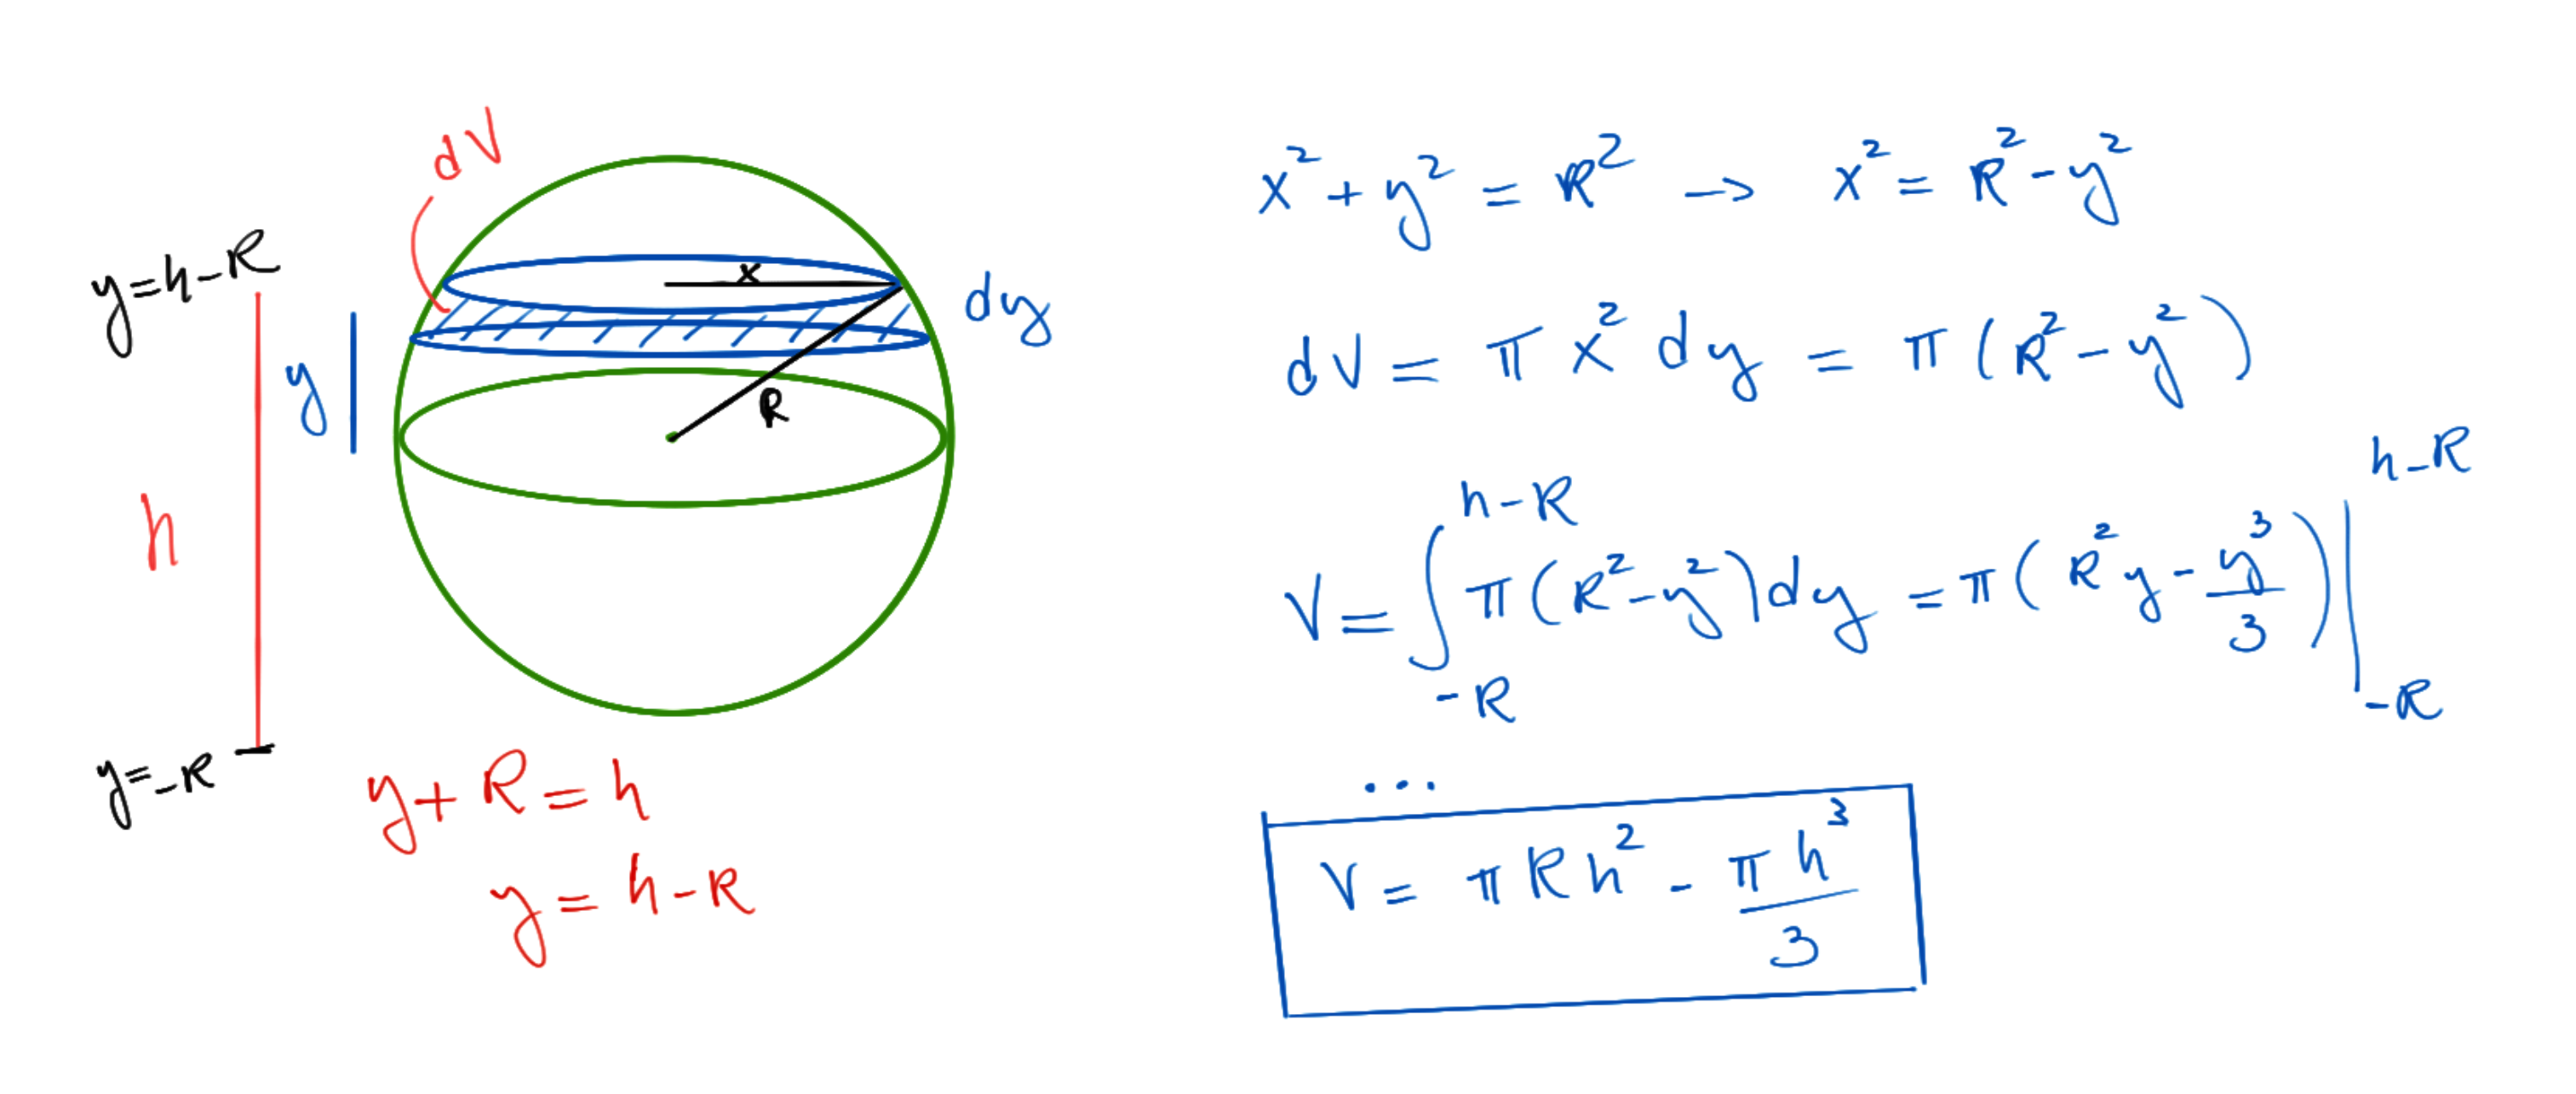

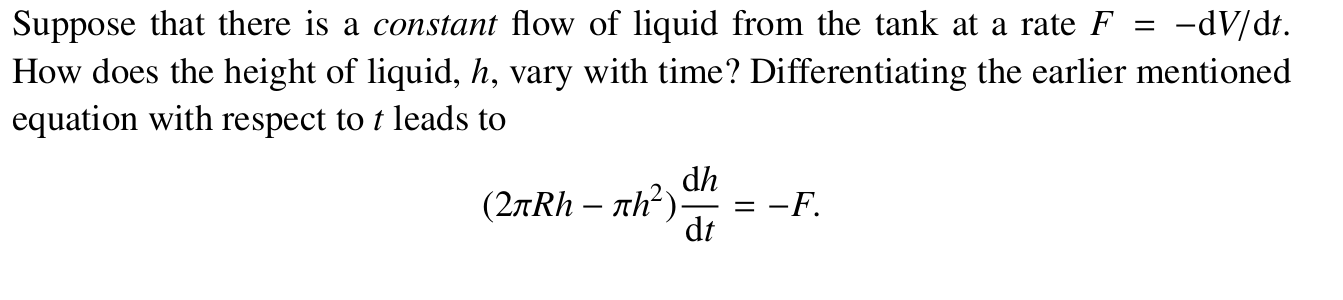

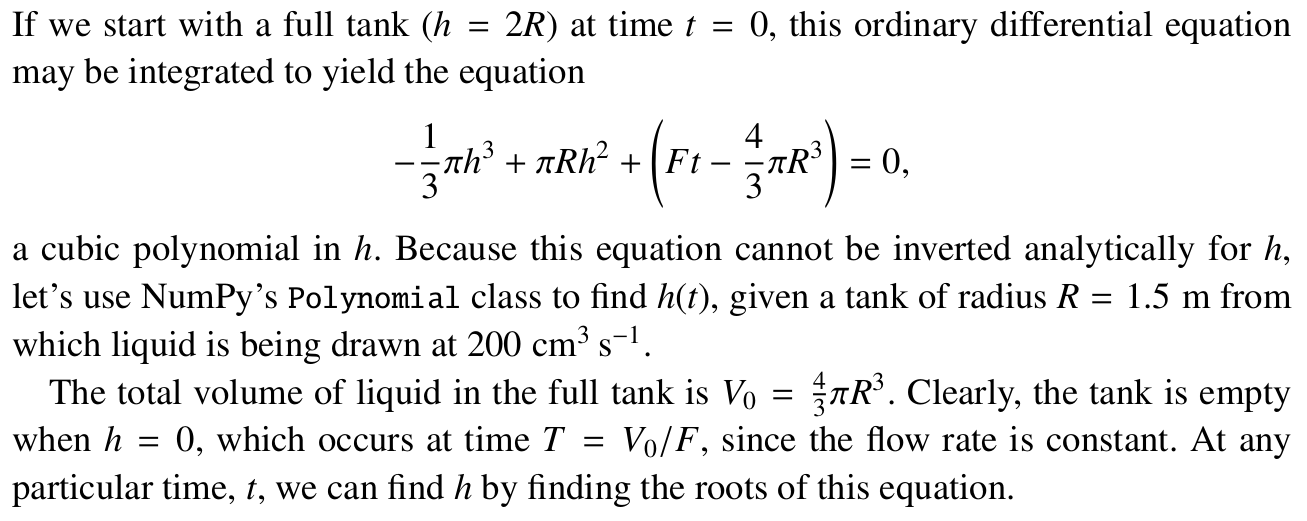

In [ ]:
(T/60.)/60.

19.634954084936204

<ipython-input-35-56fddc941b71>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  h[i] = roots[(0 <= roots) & (roots <= 2*R)][0]


Text(0, 0.5, 'Altura (m)')

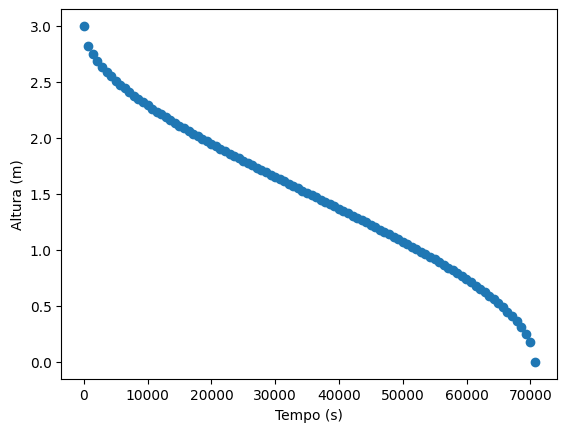

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
Polynomial  = np.polynomial.Polynomial

# raio do tanque (m)
R = 1.5
# fluxo, m^3.s-1
F = 2.e-4
# volume total
V0 = 4/3 * np.pi * R**3
# tempo para esvaziar
T = V0 / F

# coeficientes c2 e c3 do polinômio p(h)
c2, c3 = np.pi*R, -np.pi / 3

N = 100

# array com os valores de tempo t entre 0 e T
time = np.linspace(0, T, N)
# array para as alturas em cada tempo
h = np.zeros(N)

for i, t in enumerate(time):
    c0 = F*t - V0 #coeficiente c0 (o único que varia no tempo)
    p = Polynomial([c0, 0, c2, c3])
    # calcula as raízes
    roots = p.roots()
    # filtra as raízes no intervalo 0 <= h <= 2R
    h[i] = roots[(0 <= roots) & (roots <= 2*R)][0]

plt.plot(time, h, 'o')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (m)')

### Cálculo com polinômios

In [ ]:
p = Polynomial(coef=[6, -5, 1])
q = Polynomial(coef=[2, -3])

In [ ]:
p

Polynomial([ 6., -5.,  1.], domain=[-1,  1], window=[-1,  1])

In [ ]:
q

Polynomial([ 2., -3.], domain=[-1,  1], window=[-1,  1])

In [ ]:
p.deriv()

Polynomial([-5.,  2.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
p.deriv(2)

Polynomial([2.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
p.deriv(3)

Polynomial([0.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
q.integ()

Polynomial([ 0. ,  2. , -1.5], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
q.integ(2)

Polynomial([ 0. ,  0. ,  1. , -0.5], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
#lbnd=limite inferior de integração (0 por padrão)
q.integ(lbnd=1)

Polynomial([-0.5,  2. , -1.5], domain=[-1.,  1.], window=[-1.,  1.])

### Polinômios ortogonais

Além a representação em séries de potência que usamos até agora, o numpy fornece classes para implementar outros tipos de polinômios:

- `Chebyshev`
- `Legendre`
- `Laguerre`
- `Hermite`

Muitos desses polinômios vão aparecer ao longo do curso. Aqui vamos ilustrar o uso com os polinômios de Legendre. Esses polinômios surgem em diversos contextos, por exemplo, soluções da equação de Schrödinger para o átomo de hidrogênio ou na expansão multipolar do potencial elétrico.

Eles são definidos como a as soluções para a equação diferencial de Legendre:

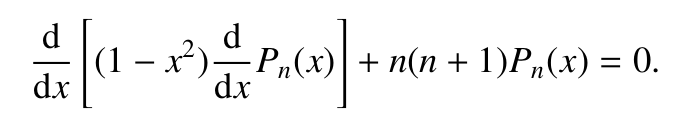

Os primeiros polinômios de Legendre são:

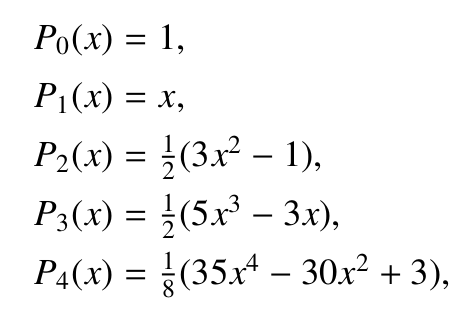

In [ ]:
from numpy.polynomial import Legendre

In [ ]:
Legendre(coef=[1])

Legendre([1.], domain=[-1,  1], window=[-1,  1])

In [ ]:
A = Legendre(coef=[1,1,1])

In [ ]:
A

Legendre([1., 1., 1.], domain=[-1,  1], window=[-1,  1])

In [ ]:
#podemos converter
A.convert(kind=Polynomial)

Polynomial([0.5, 1. , 1.5], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
A.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [ ]:
#podemos criar um Legendre usando um Polynomial
P = Polynomial([0 , 1, 1])
P

Polynomial([0., 1., 1.], domain=[-1,  1], window=[-1,  1])

In [ ]:
Q = Legendre.cast(P)
Q
#representa a combinação de ps de Legendre

Legendre([0.33333333, 1.        , 0.66666667], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
Q.convert(kind=Polynomial)

Polynomial([0., 1., 1.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
# são a mesma função
P(-4),Q(-4)

(12.0, 12.0)

In [ ]:
#para criar um polinômio da base (P3)
P3 = Legendre.basis(3)
P3

Legendre([0., 0., 0., 1.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
P3.convert(kind=Polynomial)

Polynomial([ 0. , -1.5,  0. ,  2.5], domain=[-1.,  1.], window=[-1.,  1.])

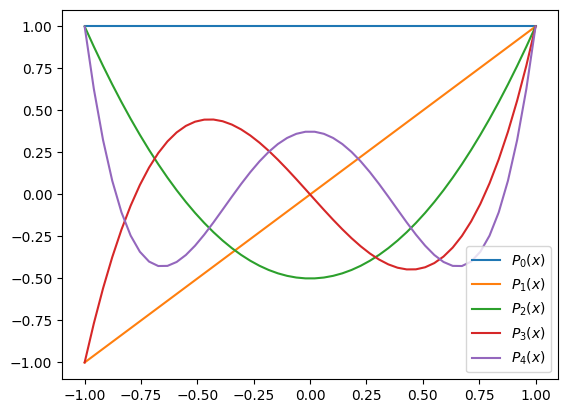

In [ ]:
x = np.linspace(-1,1)

for i in range(5):
    y = Legendre.basis(i)(x)
    plt.plot(x,y,label=f"$P_{{{i}}}(x)$")
plt.legend()
#notar a paridade

### Ajuste de polinômios

Um uso comum para polinômios é o ajuste e a aproximação de séries de dados.

Os polinômios do numpy oferecem uma função `fit` que implementa um ajuste por método do mínimos quadrados, conforme veremos mais abaixo.

**Atributos `domain` e `window`**

- `domain` ou domínio é a região ao longo do eixo $x$ que deve ser aproximada pelo polinômio.

Vale observar que qualquer polinômio diverge para $x\to\pm\infty$, o que pode tornar ajustes de polinômio um problema mal posto por conta de instabilidades numéricas.

- `window` ou janela de um polinômio representa o intervalo de valores de $x$ para o qual as combinações lineares das potências do polinômio são ótimas para fazer ajustes. Por exemplo, para os polinômios de Legendre, essa janela é $[-1,1]$.

O função `fit` ajusta a `window` do polinômio para o `domain` dos dados de maneira automática. Por exemplo:



In [ ]:
x = np.linspace(100,100.1)
f = lambda x: np.exp(-np.sin(40*x))

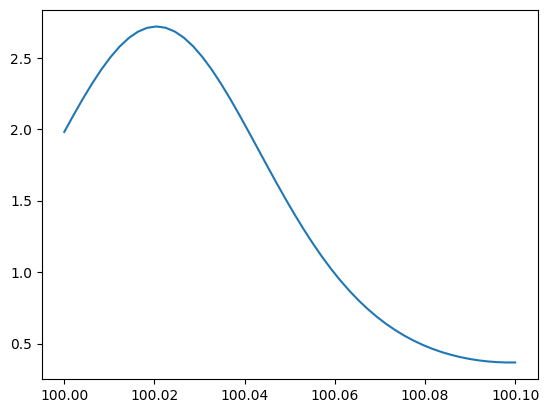

In [ ]:
plt.plot(x,f(x))

In [ ]:
# p4 = Polynomial.fit(x[x<100.04],f(x[x<100.04]),deg=4)
# print(p4)

In [ ]:
p4 = Polynomial.fit(x,f(x),deg=4)
print(p4)

1.496761885844565 - 2.532180366845466·x¹ + 0.5977305367536605·x² +
1.8096519709429009·x³ - 0.976140643100298·x⁴


In [ ]:
p4

Polynomial([ 1.49676189, -2.53218037,  0.59773054,  1.80965197, -0.97614064], domain=[100. , 100.1], window=[-1.,  1.])

In [ ]:
p4.domain, p.window

(array([100. , 100.1]), array([-1,  1]))

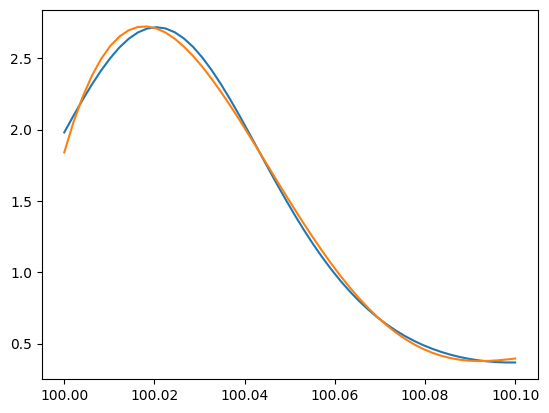

In [ ]:
x = np.linspace(100,100.1)

plt.plot(x,f(x))
plt.plot(x,p4(x))

Vale notar que ao criar um polinômio usando a classe `Polynomial`, `domain` e `window` são definidos por padrão como $(-1,1)$. Vejamos:

In [ ]:
p4

Polynomial([ 1.49676189, -2.53218037,  0.59773054,  1.80965197, -0.97614064], domain=[100. , 100.1], window=[-1.,  1.])

In [ ]:
p4.coef

array([ 1.49676189, -2.53218037,  0.59773054,  1.80965197, -0.97614064])

In [ ]:
q4 = Polynomial(p4.coef)
q4

Polynomial([ 1.49676189, -2.53218037,  0.59773054,  1.80965197, -0.97614064], domain=[-1,  1], window=[-1,  1])

In [ ]:
q4.domain, q4.window

(array([-1,  1]), array([-1,  1]))

In [ ]:
#são valores diferentes
q4(100),p4(100)

(-95798686.75499415, 1.8408801754004926)

As função que faz esse mapeamento de $x$ no domínio $(a,b)$ para $x'$ na janela $(a',b')$ é

$$
x' = \chi + \mu x
$$

com

$$
\mu=\frac{b'-a'}{b-a}
$$

e
$$
\chi = b' - b \frac{b'-a'}{b-a}
$$



In [ ]:
#para acessar esse parâmetros
chi, mu = p4.mapparms()
chi, mu

(-2001.0000000001137, 20.000000000001137)

In [ ]:
q4(chi+100*mu),p4(100)

(1.8408801754004926, 1.8408801754004926)

In [ ]:
#podemos mudar o domain
q4.domain = np.array((100., 100.1))

In [ ]:
#agora os valores são iguai
q4(100),p4(100)

(1.8408801754004926, 1.8408801754004926)

In [ ]:
p4.linspace(5)

(array([100.   , 100.025, 100.05 , 100.075, 100.1  ]),
 array([1.84088018, 2.62506942, 1.49676189, 0.54530204, 0.39582338]))

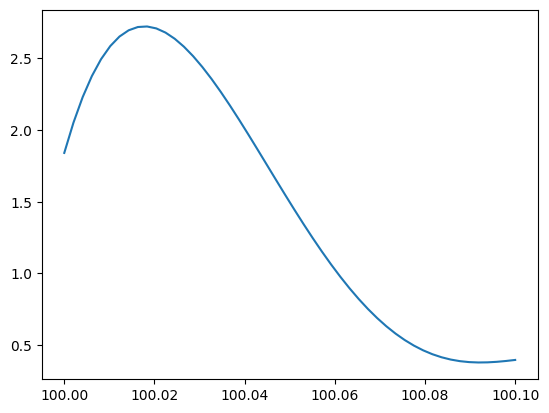

In [ ]:
#linspace com polinômios
plt.plot(*p4.linspace(50))

In [ ]:
p4.domain

array([100. , 100.1])

**`Polynomial.fit`**

Conforme já usamos, essa função retorna o polinômio $p(x)$ de grau `deg` ajustado a um dado $y$ (array) de modo a minimizar a soma dos erros quadrados:


$$
E = \sum_i |y_i-p(x_i)|^2
$$

Por exemplo,

In [ ]:
x = np.linspace(400, 700, 1000)
y = 1.*x**(-4)

In [ ]:
p = Polynomial.fit(x, y, deg=4)

In [ ]:
print(p)

1.0938730702872936e-11 - 1.164886618867227e-11·x¹ +
7.913806988092752e-12·x² - 5.6406891431301816e-12·x³ +
2.7254488861372923e-12·x⁴


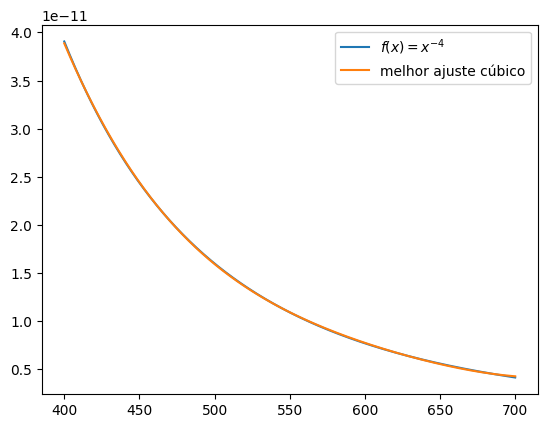

In [ ]:
plt.plot(x,y,label='$f(x)=x^{-4}$')
plt.plot(x,p(x),label='melhor ajuste cúbico')
plt.legend()

Para verificar a qualidade do ajuste, podemos usar o argumento `full=True`:

In [ ]:
deg = 1
p, [resid, rank, sing_val, rcond] = Polynomial.fit(x, y, deg, full=True)

In [ ]:
print(p)

1.4129221291952714e-11 - 1.504005075553474e-11·x¹


In [ ]:
resid

array([1.01620042e-20])

$$
\text{resid} = \sum_i |y_i-p(x_i)|^2
$$

Quanto menor o `resid` (resíduo), melhor o fit.

In [ ]:
deg = 3
p, [resid , rank, sing_val, rcond] = Polynomial.fit(x, y, deg, full=True)
resid

array([4.57180972e-23])

Os outros parâmetros têm relação com o [método de mínimos quadrados](https://en.wikipedia.org/wiki/Ordinary_least_squares).

*Exemplo E6.12:* Ajuste de uma função linear.

Os dados abaixo mostram a *absorbância* $A$ ao longo de uma caminho de $l=5$ mm de luz ultravioleta (280 nm) por uma proteína como função de sua concentração $P$ em uma solução.

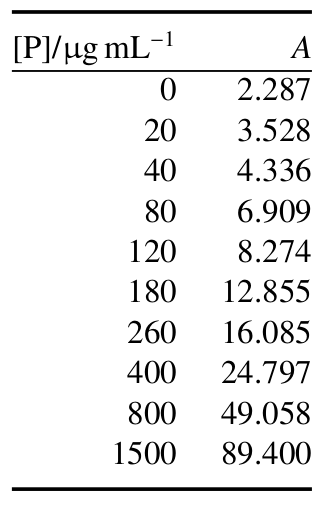

A absorbância $A$ é esperada ser uma função linear da concentração, uma relação normalmente chamada de [lei de Beer-Lambert](https://en.wikipedia.org/wiki/Beer%E2%80%93Lambert_law):

$$
A = \epsilon\, l P + A_0
$$

sendo $\epsilon$ a *absortividade* do material e $A_0$ a absorbância devido apenas à solução.



In [ ]:
concentracao = np.array([0, 20, 40, 80, 120, 180, 260, 400, 800, 1500])
absorbancia  = np.array([2.287, 3.528, 4.336, 6.909, 8.274, 12.855,
                         16.085, 24.797,49.058, 89.400])

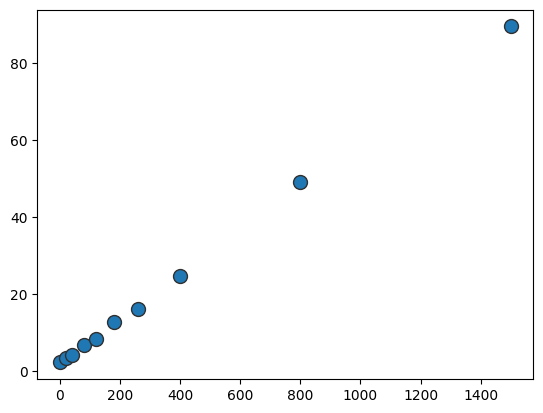

In [ ]:
plt.plot(concentracao, absorbancia,'o',
         ms=10,markeredgecolor='#303030')

In [ ]:
cmin, cmax = min(concentracao), max(concentracao)

pfit, [resid, rank, sing_val, rcond] = Polynomial.fit(concentracao,absorbancia,
                                                       deg=1, full=True,
                                                       window=(cmin, cmax),
                                                       domain=(cmin, cmax))

pfit

Polynomial([1.92896129, 0.0583057 ], domain=[   0., 1500.], window=[   0., 1500.])

In [ ]:
resid

array([2.47932733])

In [ ]:
#Root-mean-square deviation
rms = np.sqrt(resid[0]/len(concentracao))
rms

0.49792844122655494

Text(0, 0.5, 'Absorbância, $A$')

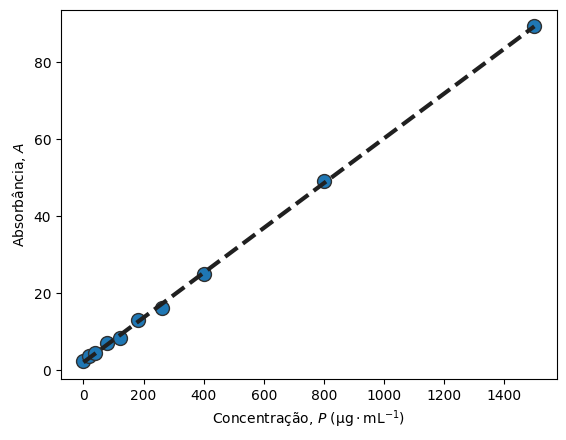

In [ ]:
plt.plot(concentracao, absorbancia,'o',
         ms=10,markeredgecolor='#303030')
plt.plot(concentracao, pfit(concentracao),'--',
         lw=3,color='#202020')

plt.xlabel('Concentração, $P$ ($\mathrm{\mu g\cdot mL^{-1}}$)')
plt.ylabel('Absorbância, $A$')

In [ ]:
pfit.coef

array([1.92896129, 0.0583057 ])

In [ ]:
pfit.coef[1]/5 #mL⋅mol−1⋅mm−1

0.011661140420468074

Esse número representa o [*molar attenuation coefficient*](https://en.wikipedia.org/wiki/Molar_absorption_coefficient) ou a *absortividade*  $\epsilon$ do material.

## Álgebra linear



### Operações matriciais básicas

O numpy permite realizar operações matriciais diretamente com arrays de duas dimensões.

In [ ]:
A = np.array([[0, 0.5], [-1, 2]])
A

array([[ 0. ,  0.5],
       [-1. ,  2. ]])

In [ ]:
B = np.array([[2, -0.5] , [3, 1.5]])
B

array([[ 2. , -0.5],
       [ 3. ,  1.5]])

In [ ]:
#multiplicar por escalar
A*5

array([[ 0. ,  2.5],
       [-5. , 10. ]])

In [ ]:
#multiplicar duas matrizes
A.dot(B)

array([[1.5 , 0.75],
       [4.  , 3.5 ]])

In [ ]:
#multiplicar duas matrizes
A@B

array([[1.5 , 0.75],
       [4.  , 3.5 ]])

In [ ]:
#mutiplica elemento a elemento
A*B

array([[ 0.  , -0.25],
       [-3.  ,  3.  ]])

In [ ]:
#matriz transposta
A.transpose()

array([[ 0. , -1. ],
       [ 0.5,  2. ]])

In [ ]:
#matriz transposta
A.T

array([[ 0. , -1. ],
       [ 0.5,  2. ]])

In [ ]:
#matriz identidade
np.eye(3,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Outros produtos com matrizes e vetores

In [ ]:
a = np.array([1 , 2, 3])
b = np.array([0 , 1, 2])

In [ ]:
#produto interno
np.inner(a,b), a.dot(b)

(8, 8)

In [ ]:
#produto externo
np.outer(a, b)

array([[0, 1, 2],
       [0, 2, 4],
       [0, 3, 6]])

In [ ]:
A = np.array([[0 , 0.5], [-1, 2]])

In [ ]:
#potenciação de matriz
np.linalg.matrix_power(A, 3)

array([[-1.  ,  1.75],
       [-3.5 ,  6.  ]])

In [ ]:
#o mesmo que
A@A@A

array([[-1.  ,  1.75],
       [-3.5 ,  6.  ]])

In [ ]:
#potenciação elemento a elemento
A**3

array([[ 0.   ,  0.125],
       [-1.   ,  8.   ]])

In [ ]:
#o mesmo que
A*A*A

array([[ 0.   ,  0.125],
       [-1.   ,  8.   ]])

*Exemplo E613:* Matriz de rotação 2d:

$$R =
\begin{bmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta\\
\end{bmatrix}
$$

In [ ]:
def rot_matriz(theta=30):
    #converte para radianos
    theta = np.radians(theta)
    c, s = np.cos(theta), np.sin(theta)

    R = np.array([[c, -s], [s, c]])

    return R

In [ ]:
rot_matriz()

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [ ]:
v = np.array([1,0])
rot_matriz()@v

array([0.8660254, 0.5      ])

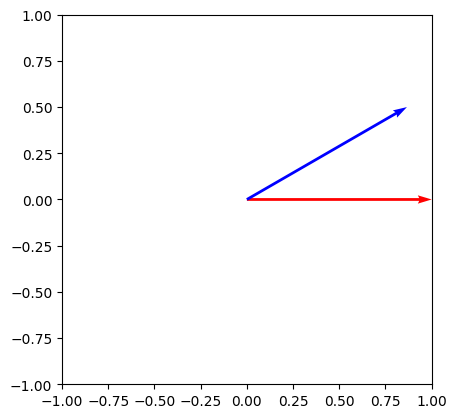

In [ ]:
plt.quiver(0, 0,v[0],v[1], angles='xy', scale=1, scale_units='xy', color='r')
rot_v = rot_matriz()@v
plt.quiver(0, 0,rot_v[0],rot_v[1], angles='xy', scale=1, scale_units='xy',
           color='b')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')

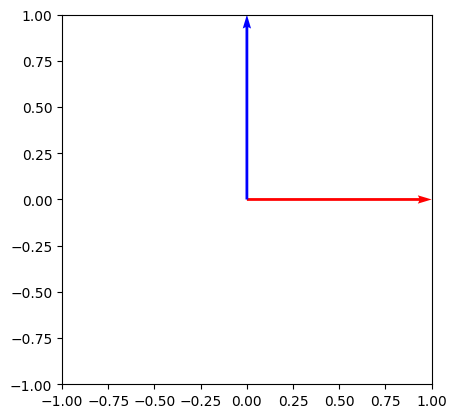

In [ ]:
plt.quiver(0, 0,v[0],v[1], angles='xy', scale=1, scale_units='xy', color='r')
rot_v = rot_matriz(90)@v
plt.quiver(0, 0,rot_v[0],rot_v[1], angles='xy', scale=1, scale_units='xy',
           color='b')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')


In [ ]:
from ipywidgets import interact

In [ ]:
@interact(theta=(0,360,1))
def f_(theta=30):
    plt.quiver(0, 0,v[0],v[1], angles='xy', scale=1, scale_units='xy', color='r')
    rot_v = rot_matriz(theta)@v
    plt.quiver(0, 0,rot_v[0],rot_v[1], angles='xy', scale=1, scale_units='xy',
            color='b')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.gca().set_aspect('equal')
    plt.show()

interactive(children=(IntSlider(value=30, description='theta', max=360), Output()), _dom_classes=('widget-inte…

### Outras propriedades de matrizes

* Norma de Frobenius

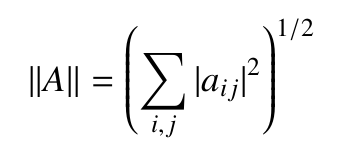

* Norma euclidiana:

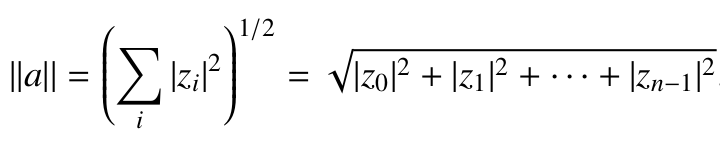

In [ ]:
A = np.array([[0, 0.5], [-1, 2]])
A

array([[ 0. ,  0.5],
       [-1. ,  2. ]])

In [ ]:
#norma de Frobenius
np.linalg.norm(A)

2.29128784747792

In [ ]:
# o mesmo que
(0+0.5**2+(-1)**2+2**2)**0.5

2.29128784747792

In [ ]:
C = np.array([1, 2j, 1 - 1j])

In [ ]:
#norma euclidiana
np.linalg.norm(C)

2.6457513110645907

In [ ]:
#o mesmo que
(1**2 + (abs(2j))**2 + (abs(1 - 1j))**2)**0.5

2.6457513110645907

In [ ]:
abs(2j)

2.0

In [ ]:
#determinante
np.linalg.det(A)

0.5

In [ ]:
#traço
np.trace(A)

2.0

In [ ]:
#rank da matriz (número de colunas linearmente independentes)
np.linalg.matrix_rank(A)

2

In [ ]:
#colunas linearmente dependentes não aumentam o rank
D = np.array([[1, 1],
              [2, 2]])
np.linalg.matrix_rank(D)

1

In [ ]:
#colunas linearmente dependentes não aumentam o rank
D = np.array([[1, 2],
              [2, 4]])
np.linalg.matrix_rank(D)

1

In [ ]:
#matriz inversa
np.linalg.inv(A)

array([[ 4., -1.],
       [ 2.,  0.]])

In [ ]:
np.linalg.inv(D)

LinAlgError: Singular matrix

In [ ]:
#det==0 implica não existência da matriz inversa
np.linalg.det(D)

0.0

*Exemplo E6.14:* Sistema linear de equações.

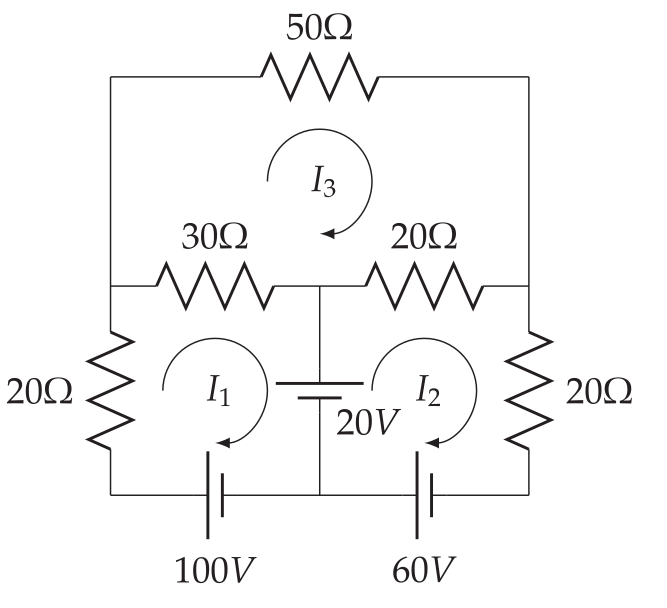

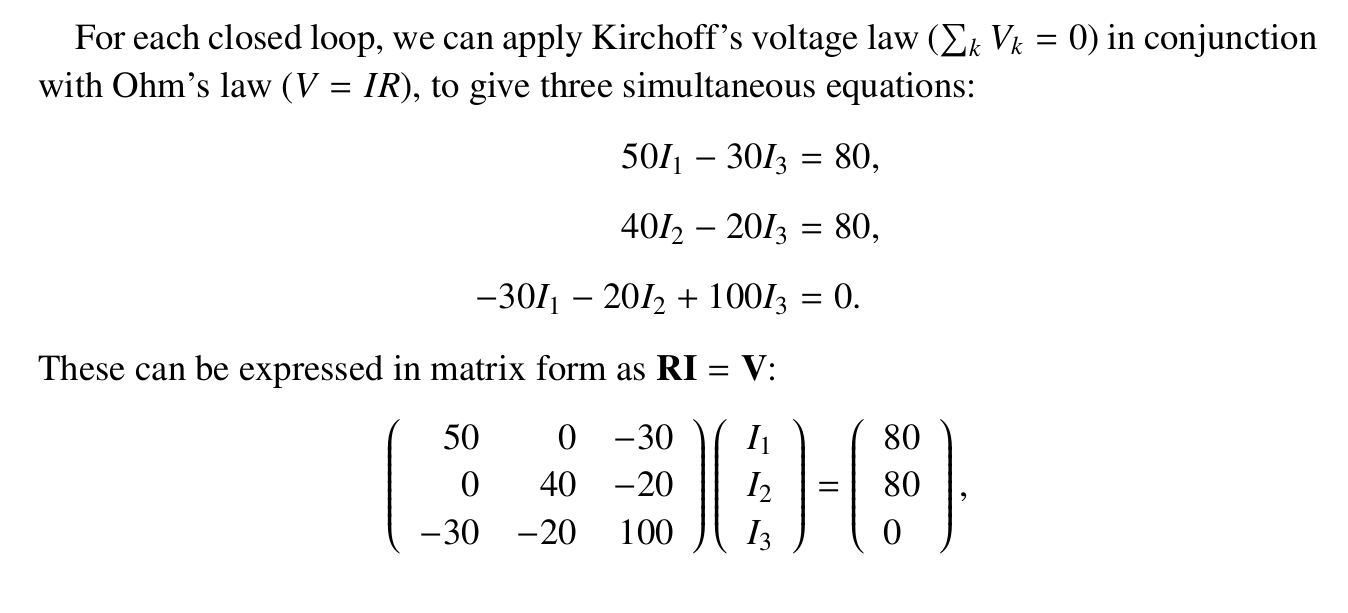

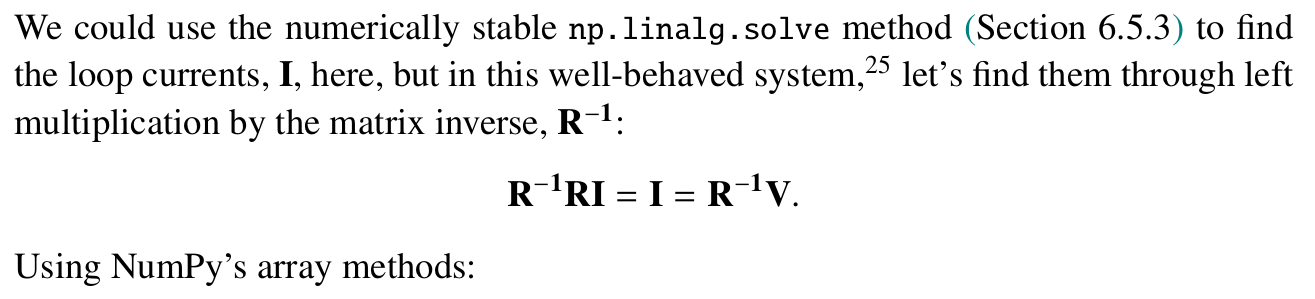

In [ ]:
R = np.array([[50, 0, -30],
              [0, 40, -20],
              [-30, -20, 100]])

V = np.array([80, 80, 0])

I = np.linalg.inv(R) @ V

#valores de I1, I2 e I3
I

array([2.33333333, 2.61111111, 1.22222222])

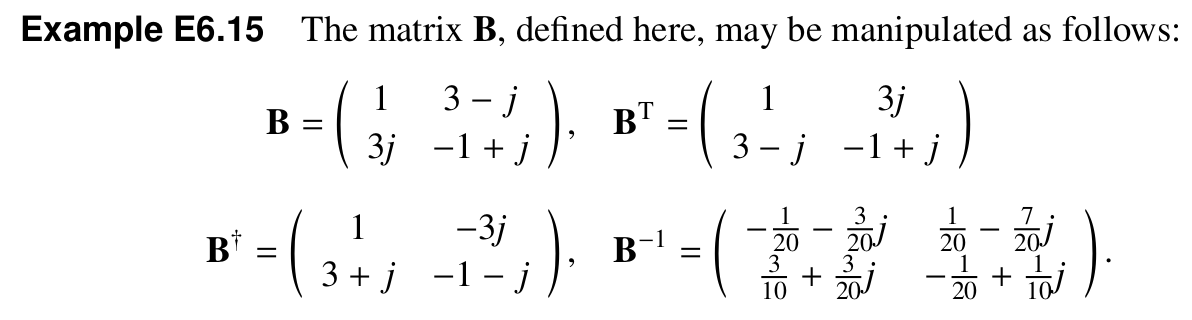

In [ ]:
B = np.matrix([[1, 3-1j],
               [3j, -1+1j]])
B

matrix([[ 1.+0.j,  3.-1.j],
        [ 0.+3.j, -1.+1.j]])

In [ ]:
B.T

matrix([[ 1.+0.j,  0.+3.j],
        [ 3.-1.j, -1.+1.j]])

In [ ]:
B.conj()

matrix([[ 1.-0.j,  3.+1.j],
        [ 0.-3.j, -1.-1.j]])

In [ ]:
#conjugação hermitiana, o famoso dagger!
B.conj().T

matrix([[ 1.-0.j,  0.-3.j],
        [ 3.+1.j, -1.-1.j]])

In [ ]:
#também pode ser assim
B.H

matrix([[ 1.-0.j,  0.-3.j],
        [ 3.+1.j, -1.-1.j]])

In [ ]:
#inversa
np.linalg.inv(B)

matrix([[-0.05-0.15j,  0.05-0.35j],
        [ 0.3 +0.15j, -0.05+0.1j ]])

In [ ]:
#também pode ser assim
B.I

matrix([[-0.05-0.15j,  0.05-0.35j],
        [ 0.3 +0.15j, -0.05+0.1j ]])

In [ ]:
F = np.array([[2,6],
              [0,-1]])
autovalores, autovetores = np.linalg.eig(F)

In [ ]:
autovalores

array([ 2., -1.])

In [ ]:
autovetores

array([[ 1.        , -0.89442719],
       [ 0.        ,  0.4472136 ]])

In [ ]:
#verificando
np.linalg.inv(autovetores)@F@autovetores

array([[ 2.,  0.],
       [ 0., -1.]])

In [ ]:
#apenas autovalores
np.linalg.eigvals(F)

array([ 2., -1.])

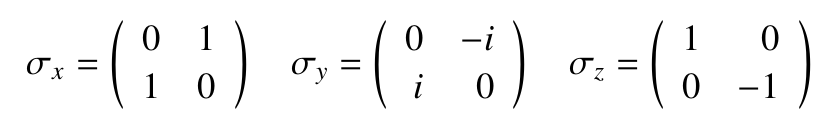

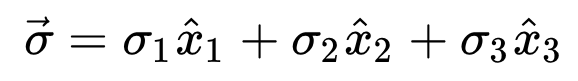

In [ ]:
#vetor de matrizes (vetor de Pauli)
pauli_matrices = np.array((
                          ((0, 1), (1, 0)),   # sigma_x
                          ((0, -1j), (1j, 0)),# sigma_y
                          ((1, 0), (0, -1))   # sigma_z
                          ))

In [ ]:
pauli_matrices

array([[[ 0.+0.j,  1.+0.j],
        [ 1.+0.j,  0.+0.j]],

       [[ 0.+0.j, -0.-1.j],
        [ 0.+1.j,  0.+0.j]],

       [[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]]])

In [ ]:
np.linalg.eig(pauli_matrices)

(array([[ 1.+0.j, -1.+0.j],
        [ 1.+0.j, -1.+0.j],
        [ 1.+0.j, -1.+0.j]]),
 array([[[ 0.70710678-0.j        ,  0.70710678+0.j        ],
         [ 0.70710678+0.j        , -0.70710678-0.j        ]],
 
        [[-0.        -0.70710678j,  0.70710678+0.j        ],
         [ 0.70710678+0.j        ,  0.        -0.70710678j]],
 
        [[ 1.        +0.j        ,  0.        +0.j        ],
         [ 0.        +0.j        ,  1.        +0.j        ]]]))

In [ ]:
np.linalg.eigvals(pauli_matrices)

array([[ 1.+0.j, -1.+0.j],
       [ 1.+0.j, -1.+0.j],
       [ 1.+0.j, -1.+0.j]])

In [ ]:
np.linalg.eigvals(pauli_matrices[0])

array([ 1.+0.j, -1.+0.j])

In [ ]:
np.linalg.eigvals(pauli_matrices[1])

array([ 1.+0.j, -1.+0.j])

In [ ]:
np.linalg.eigvals(pauli_matrices[2])

array([ 1.+0.j, -1.+0.j])

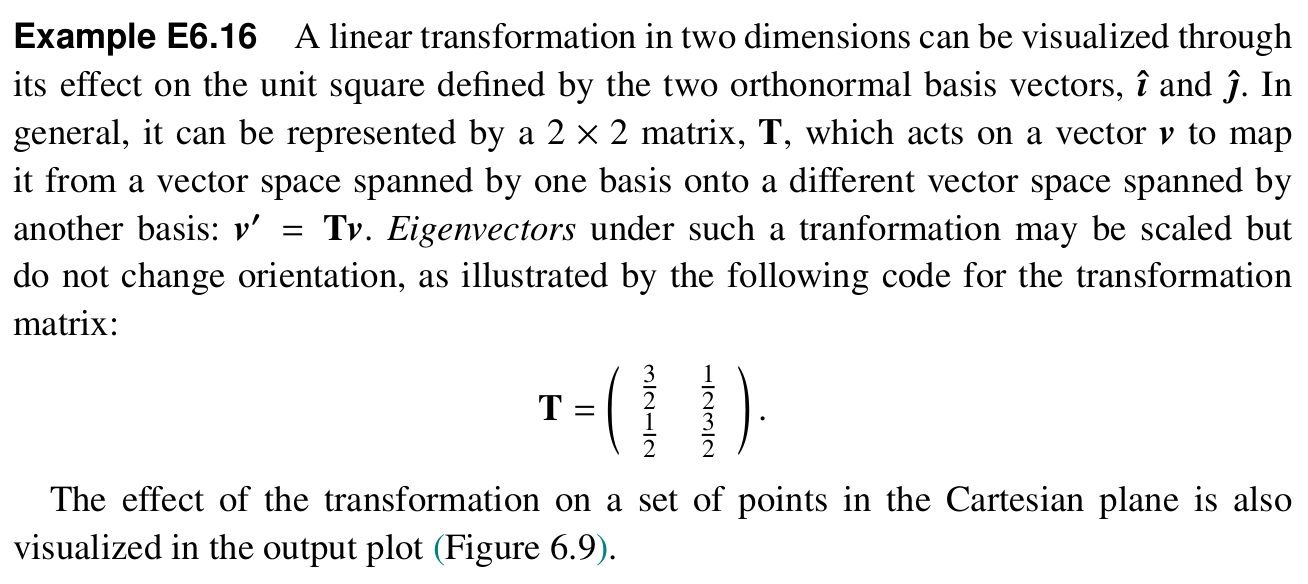

[2. 1.] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


(-3.0, 3.0)

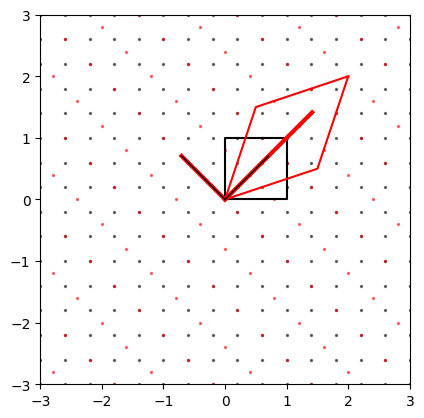

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up a Cartesian grid of points.
XMIN, XMAX, YMIN, YMAX = -3, 3, -3, 3
N = 16
xgrid = np.linspace(XMIN, XMAX, N)
ygrid = np.linspace(YMIN, YMAX, N)
grid = np.array(np.meshgrid(xgrid, ygrid)).reshape(2, N**2)

# Our untransformed unit basis vectors, i and j:
basis = np.array([[1,0], [0,1]])

def plot_quadrilateral(basis, color='k'):
    """Plot the quadrilateral defined by the two basis vectors."""
    ix, iy = basis[0]
    jx, jy = basis[1]
    plt.plot([0, ix, ix+jx, jx, 0], [0, iy, iy+jy, jy, 0], color)

def plot_vector(v, color='k', lw=1):
    """Plot vector v as a line with a specified color and linewidth."""
    plt.plot([0, v[0]], [0, v[1]], c=color, lw=lw)

def plot_points(grid, color='k'):
    """Plot the grid points in a specified color."""
    plt.scatter(*grid, c=color, s=2, alpha=0.5)

def apply_transformation(basis, T):
    """Return the transformed basis after applying transformation T."""
    return (T @ basis.T).T

# The untransformed grid and unit square.
plot_points(grid)
plot_quadrilateral(basis)

# Apply the transformation matrix, S, to the scene.
S = np.array(((1.5, 0.5),
             (0.5, 1.5)))
tbasis = apply_transformation(basis, S)
plot_quadrilateral(tbasis, 'r')
tgrid = S @ grid
plot_points(tgrid, 'r')

# Find the eigenvalues and eigenvectors of S...
vals, vecs = np.linalg.eig(S)
print(vals, vecs)
if all(np.isreal(vals)):
    # ... if they're all real, indicate them on the diagram.
    v1, v2 = vals
    e1, e2 = vecs.T
    plot_vector(v1*e1, 'r', 3)
    plot_vector(v2*e2, 'r', 3)
    plot_vector(e1, 'k')
    plot_vector(e2, 'k')

# Ensure the plot has 1:1 aspect (i.e. squares look square) and set the limits.
plt.axis('square')
plt.xlim(XMIN, XMAX)
plt.ylim(YMIN, YMAX)